<a href="https://colab.research.google.com/github/ItsRajSingh/ComputerVisionLearning/blob/main/Mnist_Fashion_Detailed_%5BMLP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Functional API Example:Fashion MNIST Dataset

In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical,plot_model

from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train =x_train.astype('float32')/255
x_test =x_test.astype('float32')/255

In [5]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
unique,counts= np.unique(y_test, return_counts=True)
print("test has",dict(zip(unique,counts)))

test has {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [8]:
unique, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

[0 8 1 9 1 0 5 8 2 5 8 6 5 6 2 0 6 8 3 8 3 7 3 3 0]


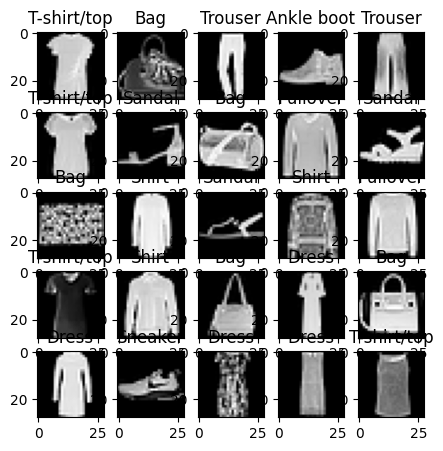

In [9]:
indexes = np.random.randint(0,x_train.shape[0],size=25)
images = x_train[indexes]
labels = y_train[indexes]
print(labels)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis == False
plt.show()


In [10]:
for i in labels:
  print(class_names[i])

T-shirt/top
Bag
Trouser
Ankle boot
Trouser
T-shirt/top
Sandal
Bag
Pullover
Sandal
Bag
Shirt
Sandal
Shirt
Pullover
T-shirt/top
Shirt
Bag
Dress
Bag
Dress
Sneaker
Dress
Dress
T-shirt/top


Convert this into one hot encoding

In [11]:
input_shape= (x_train.shape[1:] +(1,))
# The x_train has num_samples,height, width as dimensions
# x_train.shape[1:] gives us the height and width of the the image
# Since this is a greyscale image we need another dimension for the colour channel
# So we add + (1,) dimension for the color of the image, i.e Greyscale
num_classes =len(np.unique(y_train))
num_classes

10

In [12]:
input_shape

(28, 28, 1)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
input_ = keras.layers.Input(shape=input_shape)
batchnorm = keras.layers.BatchNormalization()(input_)
layer1 = keras.layers.Dense(units = 128,activation = 'relu')(batchnorm)
dropout1 = keras.layers.Dropout(0.2)(layer1)
layer2 = keras.layers.Dense(units = 128, activation = 'relu')(dropout1)
dropout2 = keras.layers.Dropout(0.2)(layer2)
flatten = keras.layers.Flatten()(dropout2)
layer4 = keras.layers.Dense(units = 128,activation = 'relu')(flatten)
layer3 = keras.layers.Dense(units = 128,activation = 'relu')(layer4)
output = keras.layers.Dense(units = num_classes, activation = 'softmax')(layer3)
model = keras.Model(input_,output)


In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 28, 28, 128)         │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 28, 28, 128)         │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,879,758 (49.13 MB)

 Trainable params: 12,879,756 (49.13 MB)

 Non-trainable params: 2 (8.00 B)

In [16]:
model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

In [17]:
model.fit(np.expand_dims(x_train,-1),y_train,epochs=5,batch_size=64)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7753 - loss: 0.6296
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8649 - loss: 0.3704
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8752 - loss: 0.3328
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8906 - loss: 0.2927
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8949 - loss: 0.2730


In [19]:
loss, acc = model.evaluate(x_test, y_test, batch_size = 64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8726 - loss: 0.3401
